In [3]:
import os
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import tensorflow as tf
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping
from tensorflow.keras.models import Sequential,load_model,save_model
from tensorflow.keras.layers import Dense,Conv2D,Flatten,MaxPooling2D
from keras.layers import BatchNormalization
from keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np
import requests
from io import BytesIO
from PIL import Image

In [2]:
model = load_model('/Users/sukanya/Desktop/Gender Classification/Model/Gender-Classfication Model.h5')

In [4]:
target_size = 224

1/1 [==============================] - 0s 35ms/step
Image URL: https://instagram.fvns1-2.fna.fbcdn.net/v/t51.2885-19/328228206_733195351662866_3465759205145234603_n.jpg?stp=dst-jpg_e0_s150x150&_nc_ht=instagram.fvns1-2.fna.fbcdn.net&_nc_cat=1&_nc_ohc=z99T_zdHZfkQ7kNvgHwCHPP&edm=AOQ1c0wBAAAA&ccb=7-5&oh=00_AYC_Kp67POWjAmkcxxAe1t3cbMnvJ-HbgVKbic5qTxs_9w&oe=66718520&_nc_sid=8b3546, Predicted value: 0.9587
Prediction: This is a male


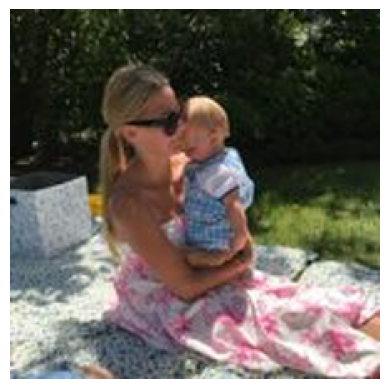

In [11]:
target_size = (224, 224)  # Ensure it's a tuple

# Direct URL of the image you want to test
image_url = "https://instagram.fvns1-2.fna.fbcdn.net/v/t51.2885-19/328228206_733195351662866_3465759205145234603_n.jpg?stp=dst-jpg_e0_s150x150&_nc_ht=instagram.fvns1-2.fna.fbcdn.net&_nc_cat=1&_nc_ohc=z99T_zdHZfkQ7kNvgHwCHPP&edm=AOQ1c0wBAAAA&ccb=7-5&oh=00_AYC_Kp67POWjAmkcxxAe1t3cbMnvJ-HbgVKbic5qTxs_9w&oe=66718520&_nc_sid=8b3546"  # Example direct image URL

# Fetch the image from URL
response = requests.get(image_url)

# Check if the request was successful and content is an image
if response.status_code == 200:
    # Try to load the image from the response content
    img = Image.open(BytesIO(response.content))
    img = img.resize(target_size)
    
    # Convert image to numpy array
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = x / 255.0
    
    # Predictions
    predictions = model.predict(x)
    predicted_value = predictions[0, 0]
    
    print(f"Image URL: {image_url}, Predicted value: {predicted_value:.4f}")
    
    threshold = 0.5
    if predicted_value > threshold:
        print("Prediction: This is a male")
    else:
        print("Prediction: This is a female")
    
    plt.imshow(img)
    plt.axis('off')
    plt.show()
else:
    print(f"Failed to retrieve image from {image_url}. Status code: {response.status_code}")